# Scatter Plot of Final Predictions

Though there were more than 2 features that were used in the model, I wanted a way to visualize the results in a way that would make sense to teachers. Thus, I chose two of the most important features (as identified through feature importance) that teachers are very familiar with - Reading Fall Percentile and Math Fall Percentile. 

In [115]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns


In [116]:
df = pd.read_csv('test_with_preds.csv')

In [117]:
data = df[['Math Fall Percentile','Reading Fall Percentile', 'y_test', 'preds']]
data

,Math Fall Percentile,Reading Fall Percentile,y_test,preds
0,80,90,1,1
1,61,72,1,1
2,6,3,0,0
3,74,91,1,1
4,74,78,1,1
...,...,...,...,...
92,54,63,1,1
93,48,58,1,1
94,50,38,1,0
95,79,76,1,1


In [118]:
def confusion_labels(df):
    if df['y_test']==1:
        if df['preds']==1:
            return "TP"
        else:
            return "FN"    
    elif df['y_test']==0 and df['preds']==0:
        return "TN"
    else:
        return "FP"
    
data['result'] = data.apply(lambda x: confusion_labels(x), axis=1)

data

,Math Fall Percentile,Reading Fall Percentile,y_test,preds,result
0,80,90,1,1,TP
1,61,72,1,1,TP
2,6,3,0,0,TN
3,74,91,1,1,TP
4,74,78,1,1,TP
...,...,...,...,...,...
92,54,63,1,1,TP
93,48,58,1,1,TP
94,50,38,1,0,FN
95,79,76,1,1,TP


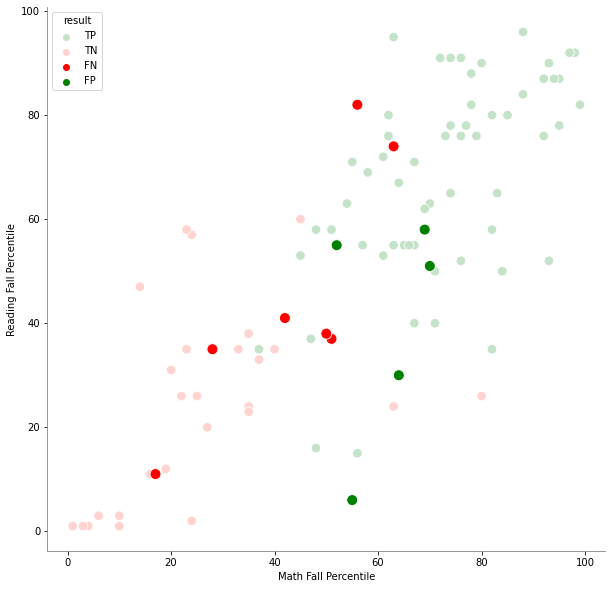

In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
# colors
light_red = '#ffd3cf'
light_green = '#c5e3c9'

data1= data.loc[(data['result']=='TP') | (data['result']=='TN')]
sns.scatterplot(data=data1, x='Math Fall Percentile', y='Reading Fall Percentile', hue='result', 
                                       palette=[light_green, light_red], s=90)

data2 = data1= data.loc[(data['result']=='FP') | (data['result']=='FN')]
sns.scatterplot(data=data2, x='Math Fall Percentile', y='Reading Fall Percentile', hue='result', 
                                       palette=['red', 'green'], s=120)

sns.despine(top=True, right=True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.savefig('results_scatter.jpg')
